In October 2015, Walt Hickey from FiveThirtyEight published a popular article where he presented strong evidence that suggests that Fandango's movie rating system was biased and dishonest. In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system following Hickey's analysis

https://fivethirtyeight.com/features/fandango-movies-ratings/

# Understanding the Data

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [3]:
fandango_after 

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


In [4]:
fandango_after.sample(10, random_state = 1)


,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [5]:
sum(fandango_previous['Fandango_votes'] < 30)

0

In [6]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


## Extract the year of the movie from the 'FILM' column and store it in the 'Year' column

In [7]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [8]:
fandango_previous['Year'].value_counts()

Year
2015    129
2014     17
Name: count, dtype: int64

In [9]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

Year
2015    129
Name: count, dtype: int64

In [10]:
fandango_after.head(2)


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [11]:
fandango_after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [12]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

year
2016    191
Name: count, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

C:\Users\Amira\AppData\Local\Temp\ipykernel_10704\791677536.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fandango_2015['Fandango_Stars'], label='2015', shade=True)
C:\Users\Amira\AppData\Local\Temp\ipykernel_10704\791677536.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fandango_2016['fandango'], label='2016', shade=True)


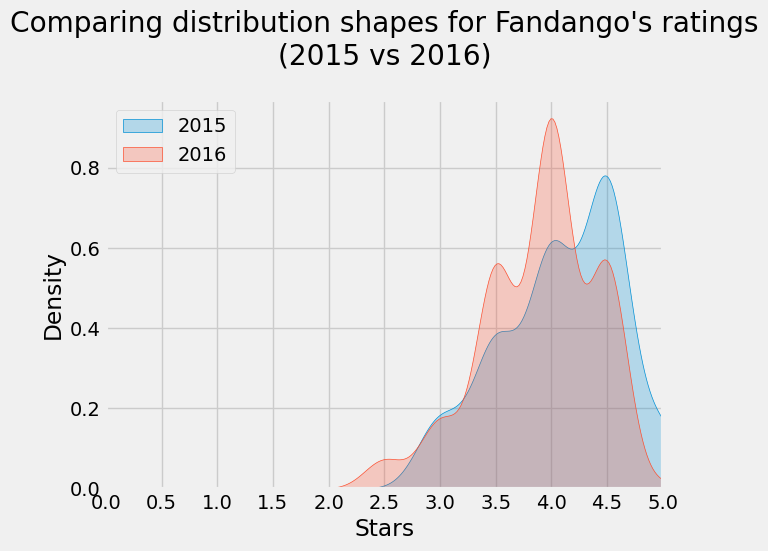

In [22]:
import seaborn as sns  # Import seaborn for creating kernel density plots
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from numpy import arange  # Import arange for generating a range of values for x-axis ticks

# Use the 'fivethirtyeight' style for the plot (clean and simple design)
plt.style.use('fivethirtyeight')

# Plot the kernel density estimate (KDE) for 2015 ratings using seaborn's kdeplot
# 'label' adds a label to the plot, 'shade=True' adds shading to the area under the curve
sns.kdeplot(fandango_2015['Fandango_Stars'], label='2015', shade=True)

# Plot the kernel density estimate (KDE) for 2016 ratings
sns.kdeplot(fandango_2016['fandango'], label='2016', shade=True)

# Set the title of the plot with padding on the y-axis
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y=1.07)

# Label the x-axis as 'Stars' (ratings)
plt.xlabel('Stars')

# Set the limits of the x-axis from 0 to 5 because movie ratings range from 0 to 5 stars
plt.xlim(0, 5)

# Set the x-axis ticks from 0 to 5 with intervals of 0.5
plt.xticks(arange(0, 5.1, .5))

# Display the legend to label the two distributions (2015 and 2016)
plt.legend()

# Show the plot
plt.show()


Both distributions are strongly left-skewed, indicating that most movies on Fandango receive high ratings.
The 2016 distribution is slightly shifted to the left compared to 2015, suggesting that ratings in 2016 were slightly lower than in 2015.
This shift highlights a small difference between Fandango's ratings for popular movies in 2015 and 2016, with ratings in 2016 being slightly lower.

# Comparing Relative Frequencies

In [17]:
import pandas as pd

# Calculate the relative frequencies and convert to percentage
fandango_2015_percentages = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100
fandango_2016_percentages = fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

# Combine the two distributions into a single DataFrame
comparison_df = pd.DataFrame({
    '2015': fandango_2015_percentages,
    '2016': fandango_2016_percentages
})

# Fill NaN values with 0 for better comparison if one dataset has a rating the other does not
comparison_df = comparison_df.fillna(0)

 


In [18]:
comparison_df

,2015,2016
2.5,0.000000,3.141361
3.0,8.527132,7.329843
3.5,17.829457,24.083770
4.0,28.682171,40.314136
4.5,37.984496,24.607330
5.0,6.976744,0.523560


In 2016, very high ratings (4.5 and 5 stars) were noticeably lower compared to 2015. Only about 1% of movies received a perfect 5-star rating in 2016, while nearly 7% received this rating in 2015. Additionally, 4.5-star ratings were more common in 2015, with around 13% more movies receiving a 4.5 rating in 2015 than in 2016.

The minimum rating was also lower in 2016, with 2.5 stars instead of 3 stars, which was the minimum in 2015. This indicates a clear difference in the rating distributions between the two years.

However, for some ratings, the percentage increased in 2016. A greater proportion of movies received 3.5 and 4 stars in 2016 compared to 2015. These high ratings challenge the trend observed in the kernel density plots

# Determining the Direction of the Change

In [19]:
# Calculating basic statistics for 2015 and 2016
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

# Creating a summary DataFrame
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

# Displaying the summary
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


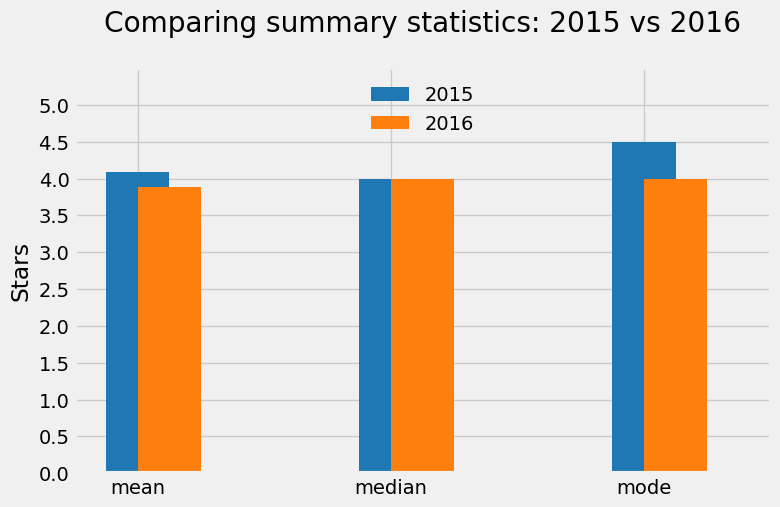

In [24]:
import matplotlib.pyplot as plt
from numpy import arange

# Set the style for the plot
plt.style.use('fivethirtyeight')

# Plotting the bar graph for 2015 and 2016 with customizations
# Change the color for 2015 to '#1f77b4' (blue) and for 2016 to '#ff7f0e' (orange)
summary['2015'].plot.bar(color = '#1f77b4', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#ff7f0e', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

# Adding plot details
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0, 5.5)
plt.yticks(arange(0, 5.1, .5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')

# Display the plot
plt.show()


The average rating in 2016 was about 0.2 lower, reflecting a decrease of nearly 5% compared to the average rating in 2015.

In [26]:
percentage_change = (summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]
print(f"Percentage change in the average rating from 2015 to 2016: {percentage_change * 100:.2f}%")


Percentage change in the average rating from 2015 to 2016: 4.84%


C:\Users\Amira\AppData\Local\Temp\ipykernel_10704\14871148.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_change = (summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]


In [27]:
percentage_change

np.float64(0.04842683568951993)

Although the median remains the same for both years, the mode in 2016 is 0.5 lower. This, along with the mean difference, supports the trend observed in the kernel density plot: popular movies in 2016 generally received slightly lower ratings than those in 2015.

# Conclusion

Our analysis revealed a small difference between Fandango’s ratings for popular movies in 2015 and 2016. We found that, on average, popular movies from 2016 received slightly lower ratings than those from 2015. While we cannot be certain of the exact cause, it is likely that the change resulted from Fandango addressing the biased rating system after Hickey’s analysis